In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import sklearn.datasets as dta
from sklearn import datasets

In [2]:
#Read in Data, Merge the DF, and Preview.dup
mouse_metadata_path = "Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "Pymaceuticals\\data\\Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
#Check if any NaN
study_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [4]:
#Check how many mice we have
len(pd.unique(study_df['Mouse ID']))

249

In [5]:
#Find the duplicates
duplicate_entries = study_df[study_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_entries

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#Drop duplicates
complete_study = study_df.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')

In [7]:
#Make sure no more duplicates
duplicate_entries = complete_study[complete_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_entries

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [8]:
#Check how many entries we now have
len(complete_study['Mouse ID'].unique())

249

In [9]:
#Create summary statistics table
complete_study.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,19.597458,50.449276,1.023835,12.792903,25.661547
std,14.084762,8.904565,1.138507,7.186737,3.926776
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951421,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [10]:
#Create Grouping by Drug Regimen and Summary Table
drug_grouping = complete_study.groupby(['Drug Regimen'])
Tumor_Volume_by_Drug = drug_grouping['Tumor Volume (mm3)']

In [11]:
#Calculate the fields
mean = Tumor_Volume_by_Drug.mean()
stnd = Tumor_Volume_by_Drug.std()
sems = Tumor_Volume_by_Drug.sem()
median = Tumor_Volume_by_Drug.median()
var = Tumor_Volume_by_Drug.var()

#Rename Series
Tumor_Mean = mean.rename("Mean")
Tumor_Median = median.rename("Median")
Tumor_STD = stnd.rename("STD")
Tumor_Var = var.rename("Variance")
Tumor_SEM = sems.rename("SEM")

summary_stats = {'Mean': Tumor_Mean, 'Median': Tumor_Median, 'STD': Tumor_STD, 'Variance': Tumor_Var, 'SEM': Tumor_SEM}
Drug_Regimen_Summary = pd.DataFrame(summary_stats)
Drug_Regimen_Summary

,Mean,Median,STD,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


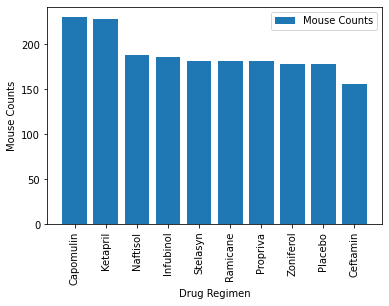

In [12]:
#PyPlot bar chart of drug administration
mice_counts = complete_study['Drug Regimen'].value_counts()
x_axis = pd.unique(complete_study['Drug Regimen'])
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Counts")
plt.bar(x_axis, mice_counts)
plt.legend(labels=['Mouse Counts'], loc="best")
plt.xticks(rotation=90)

plt.show()

<AxesSubplot:xlabel='Drug Regimen'>

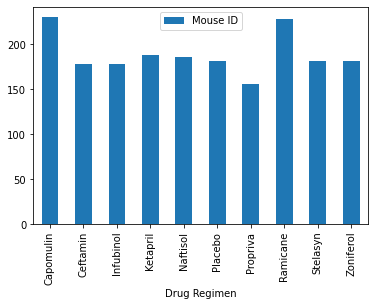

In [13]:
#DataFrame plot
Drug_Counts = pd.DataFrame(drug_grouping['Mouse ID'].count())
Drug_Counts.plot(kind="bar")

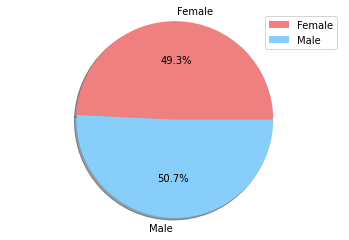

In [14]:
#Gender Grouping
gender_grouping = complete_study.groupby(['Sex'])
Gender_Counts = gender_grouping['Sex'].count()

#PyPlot Pie
values = Gender_Counts
gender_labels = pd.unique(Gender_Counts.index)
plt.pie(values, labels=gender_labels, colors=["lightcoral", "lightskyblue"], autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.legend(gender_labels)
plt.show()

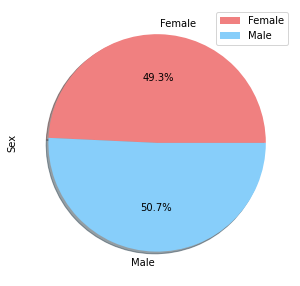

In [15]:
#DataFrame Pie
Gender_DF = pd.DataFrame(gender_grouping['Sex'].count())
#Gender_DF.plot(kind="pie")
plot = Gender_DF.plot.pie(y='Sex', colors=["lightcoral", "lightskyblue"], figsize=(5,5), shadow = True, autopct='%1.1f%%')

In [16]:
#Get final Timepoint for each mouse
mouse_group = complete_study.groupby(['Mouse ID'])
mouse_group['Timepoint'].max()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [17]:
#Merge the final Timepoint for each mouse back into complete table
#Then, drop the NaN values for data points not at that mouse's final timepoint
final_timepoint = complete_study.groupby(["Mouse ID"])['Timepoint'].max()
final_timepoint = final_timepoint.reset_index()
final_timepoint = final_timepoint.dropna()
merged_data = final_timepoint.merge(complete_study,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
#Create Promising_Results dataframe

all_tumor_volumes = []
promising_studies = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in promising_studies:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    all_tumor_volumes.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers.values}")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")

Capomulin's potential outliers: []
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Ramicane's potential outliers: []
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Infubinol's potential outliers: [36.3213458]
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Ceftamin's potential outliers: []
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997


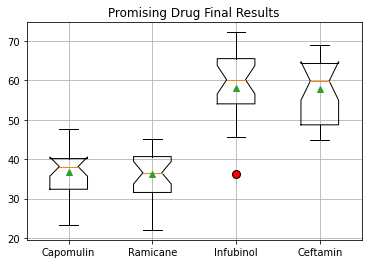

In [19]:
#Create box plot

outlier_format = dict(markerfacecolor='red',markersize=8)
plt.boxplot(all_tumor_volumes, notch=True, showmeans=True, labels=promising_studies, showfliers=True, flierprops=outlier_format)
plt.grid()
#plt.ylim(all_tumor_volumes.min() - 2, all_tumor_volumes.max() + 2)
plt.title('Promising Drug Final Results')

plt.show()

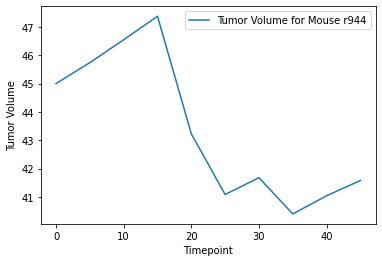

In [20]:
#Line Chart for random mouse with Capomulin

mouse_r944 = complete_study.loc[complete_study['Mouse ID'] == 'r944']

x_value = mouse_r944['Timepoint']
y_value = mouse_r944['Tumor Volume (mm3)']

plt.plot(x_value, y_value)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.legend(labels=['Tumor Volume for Mouse r944'], loc="best")
plt.show()

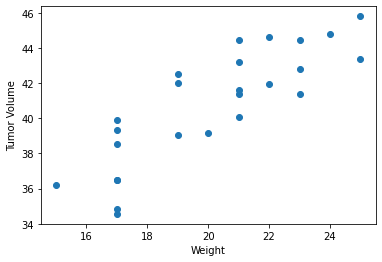

In [21]:
#Scatter plot for Capomulin

Capomulin_df = complete_study.loc[complete_study['Drug Regimen'] == 'Capomulin']
capomulin_average = Capomulin_df.groupby(['Mouse ID']).mean()
x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
#plt.ylim(Capomulin_df['Tumor Volume (mm3)'].min(), Capomulin_df['Tumor Volume (mm3)'].max())
#plt.xlim(Capomulin_df['Weight (g)'].min(), Capomulin_df['Weight (g)'].max())
#plt.legend(labels=['Tumor Volume to Mouse Weight'], loc="best")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

In [22]:
#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(Capomulin_df['Weight (g)'], Capomulin_df['Tumor Volume (mm3)'])
regress_values = Capomulin_df['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.96x + 21.49'

In [23]:
#Correlation coefficient and P Value
correlation_coefficient = st.pearsonr(Capomulin_df['Weight (g)'], Capomulin_df['Tumor Volume (mm3)'])
correlation_coefficient

(0.5256995552077173, 9.60544662950146e-18)

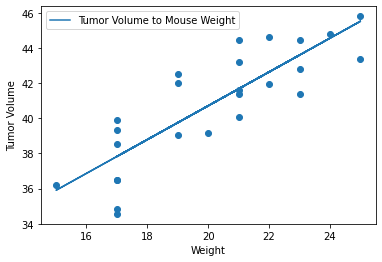

In [24]:
#Scatter with linear regression

regression = slope * x_values + intercept


#plt.ylim(Capomulin_df['Tumor Volume (mm3)'].min() - 2, Capomulin_df['Tumor Volume (mm3)'].max() + 2)
#plt.xlim(Capomulin_df['Weight (g)'].min() - 1, Capomulin_df['Weight (g)'].max() + 1)
plt.scatter(x_values,y_values)
plt.plot(x_values,regression)
plt.legend(labels=['Tumor Volume to Mouse Weight'], loc="best")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

Observations

The two most promising drug regimes were Capomulin and Ramicane. Ketapril is likely the least promising.
Only 130 of the 249 mice made it to the final timepoint of the study. This could skew some of the data for the drugs that had a disproportinate number of mice make it to the last timepoint.
It was interesting how spread out the Tumor volumes were at lower weights but not as much at higher weights. Also, it seems the data has small variance overall.
If I were doing further research, I may try to draw conclusions comparing age with responsiveness to the drugs. There was a wide range of ages to sample.